In [1]:
import os
os.chdir('/home/jaentrouble/hrnet_pretrain')
print(os.getcwd())

/home/jaentrouble/hrnet_pretrain


In [13]:
%matplotlib inline

In [2]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 749 bytes | 749.00 KiB/s, done.
From https://github.com/jaentrouble/hrnet_pretrain
   500422a..366b60d  master     -> origin/master
Updating 500422a..366b60d
Fast-forward
 check_dataset.ipynb | 5 ++---
 model_trainer.py    | 3 ++-
 2 files changed, 4 insertions(+), 4 deletions(-)


In [3]:
from model_trainer import create_train_dataset

In [4]:
img_dir = '/home/jaentrouble/data/imagenet/train'
img_names = os.listdir(img_dir)

In [5]:
import json

In [6]:
with open('meta.json','r') as f:
    label_dict=json.load(f)

In [11]:
img_size = (800,600)
ds = create_train_dataset(
    img_dir,
    img_names,
    label_dict,
    img_size,
    32,
    buffer_size=1000,
)

In [21]:
sample = ds.take(5).as_numpy_iterator()

In [22]:
import matplotlib.pyplot as plt

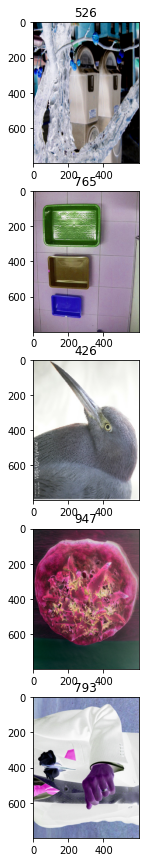

In [23]:
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(sample):
    ax = fig.add_subplot(5,1,i+1)
    img = s[0][0]
    ax.imshow(img)
    ax.title.set_text(s[1][0])
plt.show()